In [1]:
import os
os.chdir('../')

In [2]:
import DeepPurpose.oneliner as oneliner
from DeepPurpose import dataset

In [3]:
target, target_name = dataset.load_SARS_CoV_Protease_3CL()
train_drug, train_target, train_y = dataset.load_AID1706_SARS_CoV_3CL('./data', seed = 1234)
X_repurpose, drug_names, drug_CID = dataset.load_antiviral_drugs('./data')

Beginning Processing...


/home/kh278/.conda/envs/DeepPurpose/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kh278/DeepPurpose/dataset.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['binary_label'][(val.PUBCHEM_ACTIVITY_SCORE >= threshold) & (val.PUBCHEM_ACTIVITY_SCORE <=100)] = 1


Default binary threshold for the binding affinity scores is 15, recommended by the investigator
Done!


In [4]:
len(train_drug)

26640

In [5]:
target

'SGFKKLVSPSSAVEKCIVSVSYRGNNLNGLWLGDSIYCPRHVLGKFSGDQWGDVLNLANNHEFEVVTQNGVTLNVVSRRLKGAVLILQTAVANAETPKYKFVKANCGDSFTIACSYGGTVIGLYPVTMRSNGTIRASFLAGACGSVGFNIEKGVVNFFYMHHLELPNALHTGTDLMGEFYGGYVDEEVAQRVPPDNLVTNNIVAWLYAAIISVKESSFSQPKWLESTTVSIEDYNRWASDNGFTPFSTSTAITKLSAITGVDVCKLLRTIMVKSAQWGSDPILGQYNFEDELTPESVFNQVGGVRLQ'

In [6]:
len(X_repurpose)

82

Loading customized repurposing dataset...
Checking if pretrained directory is valid...
Beginning to load the pretrained models...
Training on your own customized data...
in total: 26640 drug-target pairs
encoding drug...
unique drugs: 13763
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.
Use pretrained model...
Begin to train model 0 with drug encoding MPNN and target encoding CNN
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 2.8952746. Total time 0.0005555555555555556 hours
Training at Epoch 1 iteration 100 with loss 0.6925026. Total time 0.014444444444444444 hours
Validation at Epoch 1 , AUROC: 0.6995096436744034 , AUPRC: 0.07429036106716293 , F1: 0.08396124865446716
Training at Epoch 2 iteration 0 with loss 0.68295914. Total time 0.025277777777777777 hours
Training at Epoch 2 iteration 100 with loss 0.567375. Total time 0.03916666666666667 hou

Training at Epoch 2 iteration 100 with loss 0.01370963. Total time 0.020277777777777777 hours
Validation at Epoch 2 , AUROC: 0.7198921216083687 , AUPRC: 0.1949855759852599 , F1: 0.22950819672131148
Training at Epoch 3 iteration 0 with loss 0.0064470614. Total time 0.025833333333333333 hours
Training at Epoch 3 iteration 100 with loss 0.004826802. Total time 0.03305555555555555 hours
Validation at Epoch 3 , AUROC: 0.6990846681922196 , AUPRC: 0.17341377712606376 , F1: 0.11538461538461539
Training at Epoch 4 iteration 0 with loss 0.011522379. Total time 0.03861111111111111 hours
Training at Epoch 4 iteration 100 with loss 0.0005645127. Total time 0.04583333333333333 hours
Validation at Epoch 4 , AUROC: 0.7308761033017326 , AUPRC: 0.18497426992285898 , F1: 0.2222222222222222
Training at Epoch 5 iteration 0 with loss 0.0129869785. Total time 0.05138888888888889 hours
Training at Epoch 5 iteration 100 with loss 8.904777e-05. Total time 0.058611111111111114 hours
Validation at Epoch 5 , AUROC

Training at Epoch 3 iteration 100 with loss 0.08131296. Total time 0.012222222222222223 hours
Validation at Epoch 3 , AUROC: 0.6453906505393919 , AUPRC: 0.18346710639280428 , F1: 0.2823529411764706
Training at Epoch 4 iteration 0 with loss 0.027965397. Total time 0.014444444444444444 hours
Training at Epoch 4 iteration 100 with loss 0.0106874835. Total time 0.016944444444444446 hours
Validation at Epoch 4 , AUROC: 0.6764628963713631 , AUPRC: 0.18349862326064548 , F1: 0.2647058823529412
Training at Epoch 5 iteration 0 with loss 0.07962269. Total time 0.019166666666666665 hours
Training at Epoch 5 iteration 100 with loss 0.0049899057. Total time 0.021666666666666667 hours
Validation at Epoch 5 , AUROC: 0.6725073553448839 , AUPRC: 0.17377682895204807 , F1: 0.23655913978494622
Training at Epoch 6 iteration 0 with loss 0.04211598. Total time 0.02388888888888889 hours
Training at Epoch 6 iteration 100 with loss 0.008001091. Total time 0.02638888888888889 hours
Validation at Epoch 6 , AUROC: 

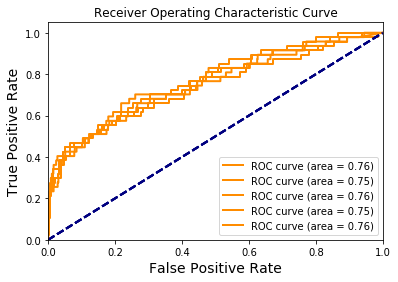

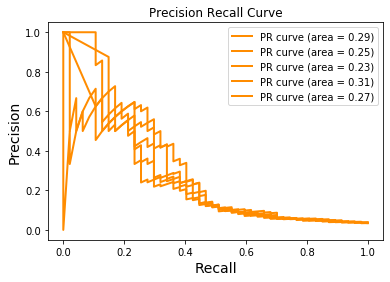

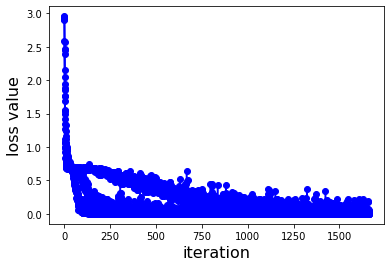

In [4]:
oneliner.repurpose(target = target, 
                    target_name = target_name, 
                    train_drug = train_drug,
                    train_target = train_target,
                    train_y = train_y,
                    X_repurpose = X_repurpose,
                    drug_names = drug_names,
                    save_dir = './save_folder',
                    finetune_batch_size = 128,
                    finetune_LR = 0.001,
                    finetune_epochs=10,
                    split='HTS',
                    convert_y = False,
                    frac=[0.8,0.1,0.1],
                    pretrained = True,
                    pretrained_dir = './save_folder/pretrained_models/DeepPurpose_BindingDB/',
                    agg = 'max_effect')